In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
import pickle
from keras.models import load_model


In [18]:
%store -r dfcehigh
%store -r dfcelow
%store -r dfcetrend
%store -r dfcevolume
%store -r dfhigh12
%store -r dfhigh13
%store -r dfhigh23

In [12]:
import os
def ensure_directory_exists(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"Directory created: {directory_path}")
    else:
        print(f"Directory already exists: {directory_path}")

directory_path = './model_saves'
ensure_directory_exists(directory_path)

Directory already exists: ./model_saves


In [13]:
def check_write_permission(directory_path):
    if os.access(directory_path, os.W_OK):
        print(f"Write permission is granted for the directory: {directory_path}")
    else:
        print(f"Write permission is not granted for the directory: {directory_path}")

check_write_permission(directory_path)

Write permission is granted for the directory: ./model_saves


Processing dataset: dfcehigh


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3912\227781491.py:109: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 13s 24ms/step - loss: 0.0510 - val_loss: 0.0403
Epoch 2/50
463/463 [==============================] - 10s 23ms/step - loss: 0.0408 - val_loss: 0.0391
Epoch 3/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0377 - val_loss: 0.0340
Epoch 4/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0359 - val_loss: 0.0361
Epoch 5/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0340 - val_loss: 0.0337
Epoch 6/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0318 - val_loss: 0.0340
Epoch 7/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0310 - val_loss: 0.0335
Epoch 8/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0300 - val_loss: 0.0340
Epoch 9/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0294 - val_loss: 0.0334
Epoch 10/50
463/463 [==============================] - 10s 22ms/step - loss: 0.028

463/463 [==============================] - 11s 23ms/step - loss: 0.0205 - val_loss: 0.0232
Epoch 59/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0202 - val_loss: 0.0236
Epoch 60/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0201 - val_loss: 0.0240
Epoch 61/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0202 - val_loss: 0.0227
Epoch 62/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0202 - val_loss: 0.0223
Epoch 63/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0200 - val_loss: 0.0227
Epoch 64/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0199 - val_loss: 0.0234
Epoch 65/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0199 - val_loss: 0.0233
Epoch 66/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0201 - val_loss: 0.0227
Epoch 67/100
463/463 [==============================] - 11s 23ms/step - loss:

232/232 [==============================] - 6s 26ms/step - loss: 0.0290 - val_loss: 0.0334
Epoch 16/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0286 - val_loss: 0.0337
Epoch 17/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0285 - val_loss: 0.0333
Epoch 18/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0285 - val_loss: 0.0333
Epoch 19/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0283 - val_loss: 0.0334
Epoch 20/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0281 - val_loss: 0.0337
Epoch 21/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0282 - val_loss: 0.0339
Epoch 22/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0280 - val_loss: 0.0332
Epoch 23/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0280 - val_loss: 0.0335
Epoch 24/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0279 - val_loss:

Epoch 45/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0245 - val_loss: 0.0330
Epoch 46/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0245 - val_loss: 0.0329
Epoch 47/50
232/232 [==============================] - 7s 28ms/step - loss: 0.0244 - val_loss: 0.0330
Epoch 48/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0245 - val_loss: 0.0329
Epoch 49/50
232/232 [==============================] - 7s 28ms/step - loss: 0.0245 - val_loss: 0.0328
Epoch 50/50
232/232 [==============================] - 2s 8ms/step - loss: 0.0274
Epoch 1/100
232/232 [==============================] - 9s 30ms/step - loss: 0.0556 - val_loss: 0.0377
Epoch 2/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0427 - val_loss: 0.0352
Epoch 3/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0399 - val_loss: 0.0352
Epoch 4/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0388 - val_loss: 0.0343


232/232 [==============================] - 6s 27ms/step - loss: 0.0217 - val_loss: 0.0235
Epoch 75/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0225 - val_loss: 0.0250
Epoch 76/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0217 - val_loss: 0.0246
Epoch 77/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0209 - val_loss: 0.0234
Epoch 78/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0206 - val_loss: 0.0242
Epoch 79/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0208 - val_loss: 0.0239
Epoch 80/100
232/232 [==============================] - 6s 28ms/step - loss: 0.0201 - val_loss: 0.0231
Epoch 81/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0201 - val_loss: 0.0237
Epoch 82/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0201 - val_loss: 0.0226
Epoch 83/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0200 - 

232/232 [==============================] - 6s 27ms/step - loss: 0.0243 - val_loss: 0.0325
Epoch 54/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0242 - val_loss: 0.0323
Epoch 55/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0243 - val_loss: 0.0323
Epoch 56/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0241 - val_loss: 0.0325
Epoch 57/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0240 - val_loss: 0.0320
Epoch 58/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0238 - val_loss: 0.0318
Epoch 59/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0238 - val_loss: 0.0314
Epoch 60/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0237 - val_loss: 0.0313
Epoch 61/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0236 - val_loss: 0.0312
Epoch 62/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0236 - 

Epoch 32/100
926/926 [==============================] - 27s 29ms/step - loss: 0.0209 - val_loss: 0.0253
Epoch 33/100
926/926 [==============================] - 27s 29ms/step - loss: 0.0205 - val_loss: 0.0323
Epoch 34/100
926/926 [==============================] - 26s 29ms/step - loss: 0.0206 - val_loss: 0.0237
Epoch 35/100
926/926 [==============================] - 27s 29ms/step - loss: 0.0201 - val_loss: 0.0235
Epoch 36/100
926/926 [==============================] - 27s 29ms/step - loss: 0.0198 - val_loss: 0.0246
Epoch 37/100
926/926 [==============================] - 27s 29ms/step - loss: 0.0198 - val_loss: 0.0238
Epoch 38/100
926/926 [==============================] - 26s 29ms/step - loss: 0.0197 - val_loss: 0.0233
Epoch 39/100
926/926 [==============================] - 26s 29ms/step - loss: 0.0196 - val_loss: 0.0240
Epoch 40/100
926/926 [==============================] - 27s 29ms/step - loss: 0.0197 - val_loss: 0.0227
Epoch 41/100
926/926 [==============================] - 27s 29ms

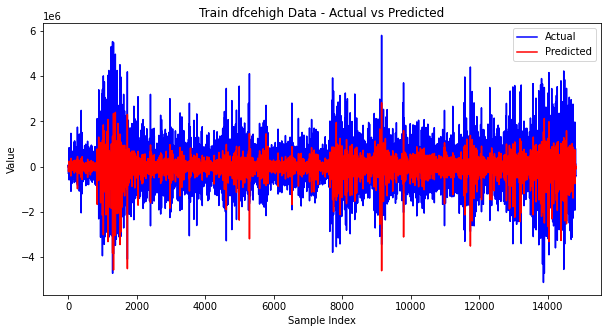

154/154 [==============================] - 2s 11ms/step
Validation dfcehigh Data: R^2 Score: 0.3420743641837124, MSE: 444300831340.2167, RMSE: 666558.9481360344, MAE: 424048.87928199896, Explained Variance Score: 0.3421766249162458, Median Absolute Error: 258339.2397608052


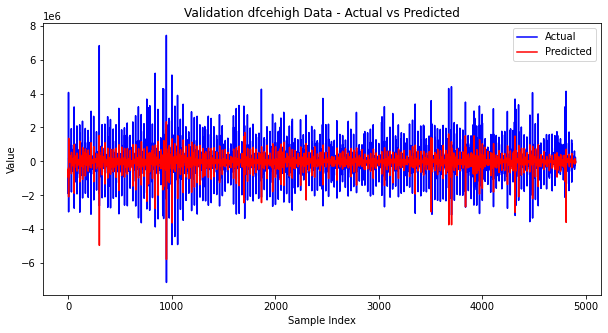

154/154 [==============================] - 2s 11ms/step
Test dfcehigh Data: R^2 Score: 0.28164803557462825, MSE: 329894071118.41986, RMSE: 574364.0579966855, MAE: 368323.6601104484, Explained Variance Score: 0.282321802907173, Median Absolute Error: 221985.9421320276


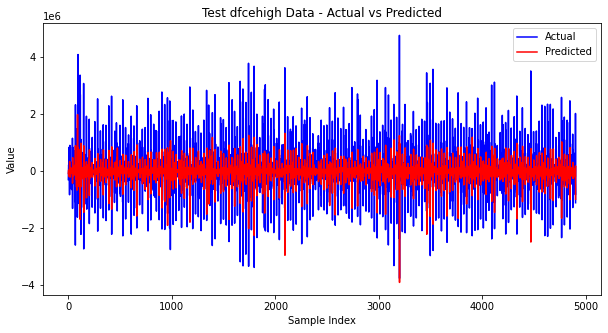

154/154 [==============================] - 2s 11ms/step
Predictions and actual values successfully saved for dfcehigh.
Total time taken for dfcehigh: 7457.14 seconds
Processing dataset: dfcelow


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3912\227781491.py:109: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 16s 31ms/step - loss: 0.0489 - val_loss: 0.0363
Epoch 2/50
463/463 [==============================] - 14s 29ms/step - loss: 0.0285 - val_loss: 0.0175
Epoch 3/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0191 - val_loss: 0.0114
Epoch 4/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0148 - val_loss: 0.0093
Epoch 5/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0116 - val_loss: 0.0071
Epoch 6/50
463/463 [==============================] - 14s 29ms/step - loss: 0.0099 - val_loss: 0.0060
Epoch 7/50
463/463 [==============================] - 14s 29ms/step - loss: 0.0084 - val_loss: 0.0047
Epoch 8/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0075 - val_loss: 0.0041
Epoch 9/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 10/50
463/463 [==============================] - 13s 29ms/step - loss: 0.006

463/463 [==============================] - 10s 22ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 31/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 32/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 33/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 34/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 35/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 36/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0050 - val_loss: 0.0053
Epoch 37/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0051 - val_loss: 0.0033
Epoch 38/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0050 - val_loss: 0.0039
Epoch 39/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0050 -

463/463 [==============================] - 10s 22ms/step - loss: 0.0052 - val_loss: 0.0039
Epoch 37/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 38/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 39/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 40/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0051 - val_loss: 0.0031
Epoch 41/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 42/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 43/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0050 - val_loss: 0.0033
Epoch 44/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 45/100
463/463 [==============================] - 10s 22ms/step - loss:

Epoch 44/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0050 - val_loss: 0.0036
Epoch 45/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 46/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 47/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0050 - val_loss: 0.0035
Epoch 48/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 49/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0049 - val_loss: 0.0035
Epoch 50/50
232/232 [==============================] - 2s 9ms/step - loss: 0.0023
Epoch 1/100
232/232 [==============================] - 10s 32ms/step - loss: 0.0608 - val_loss: 0.0410
Epoch 2/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0354 - val_loss: 0.0280
Epoch 3/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0249 - val_loss: 0.0186

Epoch 73/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0053 - val_loss: 0.0030
Epoch 74/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0055 - val_loss: 0.0040
Epoch 75/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 76/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 77/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 78/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0052 - val_loss: 0.0037
Epoch 79/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 80/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 81/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 82/100
232/232 [==============================] - 7s 30ms/step - lo

Epoch 52/100
232/232 [==============================] - 8s 32ms/step - loss: 0.0050 - val_loss: 0.0034
Epoch 53/100
232/232 [==============================] - 8s 32ms/step - loss: 0.0049 - val_loss: 0.0029
Epoch 54/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 55/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 56/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 57/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 58/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0048 - val_loss: 0.0031
Epoch 59/100
232/232 [==============================] - 8s 32ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 60/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0048 - val_loss: 0.0029
Epoch 61/100
232/232 [==============================] - 8s 32ms/step - lo

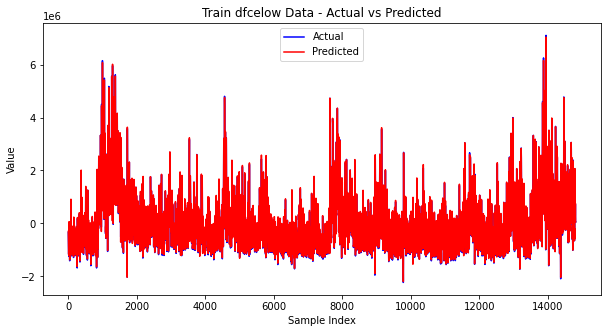

154/154 [==============================] - 2s 10ms/step
Validation dfcelow Data: R^2 Score: 0.9973134292316174, MSE: 3091556963.3629165, RMSE: 55601.77122505107, MAE: 40592.22686579881, Explained Variance Score: 0.9979804008618528, Median Absolute Error: 32960.0567691609


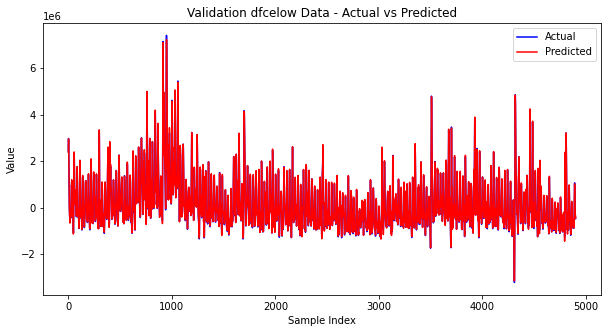

154/154 [==============================] - 2s 10ms/step
Test dfcelow Data: R^2 Score: 0.995650138182093, MSE: 2517913868.6269784, RMSE: 50178.818924193285, MAE: 38113.79424585526, Explained Variance Score: 0.9972470033994159, Median Absolute Error: 32622.414603358222


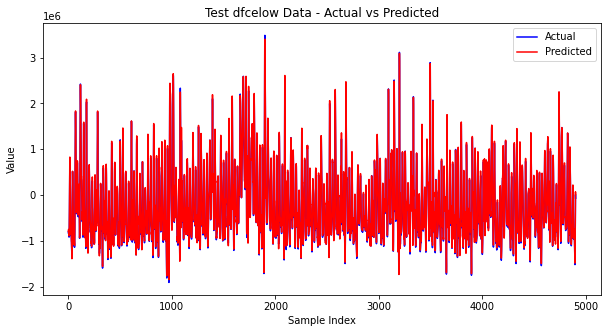

154/154 [==============================] - 2s 10ms/step
Predictions and actual values successfully saved for dfcelow.
Total time taken for dfcelow: 7196.49 seconds
Processing dataset: dfcetrend


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3912\227781491.py:109: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 15s 29ms/step - loss: 0.0339 - val_loss: 0.0306
Epoch 2/50
463/463 [==============================] - 13s 27ms/step - loss: 0.0227 - val_loss: 0.0279
Epoch 3/50
463/463 [==============================] - 13s 27ms/step - loss: 0.0195 - val_loss: 0.0122
Epoch 4/50
463/463 [==============================] - 13s 27ms/step - loss: 0.0158 - val_loss: 0.0275
Epoch 5/50
463/463 [==============================] - 13s 27ms/step - loss: 0.0130 - val_loss: 0.0071
Epoch 6/50
463/463 [==============================] - 13s 27ms/step - loss: 0.0099 - val_loss: 0.0147
Epoch 7/50
463/463 [==============================] - 13s 27ms/step - loss: 0.0085 - val_loss: 0.0137
Epoch 8/50
463/463 [==============================] - 13s 28ms/step - loss: 0.0073 - val_loss: 0.0103
Epoch 9/50
463/463 [==============================] - 13s 27ms/step - loss: 0.0070 - val_loss: 0.0097
Epoch 10/50
463/463 [==============================] - 13s 27ms/step - loss: 0.006

463/463 [==============================] - 11s 24ms/step - loss: 0.0042 - val_loss: 0.0672
Epoch 31/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0044 - val_loss: 0.0513
Epoch 32/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0045 - val_loss: 0.0521
Epoch 33/50
463/463 [==============================] - 11s 23ms/step - loss: 0.0043 - val_loss: 0.0614
Epoch 34/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0044 - val_loss: 0.0581
Epoch 35/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0044 - val_loss: 0.0885
Epoch 36/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0044 - val_loss: 0.0781
Epoch 37/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0043 - val_loss: 0.0724
Epoch 38/50
463/463 [==============================] - 11s 23ms/step - loss: 0.0043 - val_loss: 0.0444
Epoch 39/50
463/463 [==============================] - 11s 23ms/step - loss: 0.0043 -

463/463 [==============================] - 11s 25ms/step - loss: 0.0043 - val_loss: 0.0579
Epoch 37/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0044 - val_loss: 0.0333
Epoch 38/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0043 - val_loss: 0.0508
Epoch 39/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0043 - val_loss: 0.0576
Epoch 40/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0043 - val_loss: 0.0239
Epoch 41/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0044 - val_loss: 0.0778
Epoch 42/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0043 - val_loss: 0.0615
Epoch 43/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0044 - val_loss: 0.0123
Epoch 44/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0042 - val_loss: 0.0583
Epoch 45/100
463/463 [==============================] - 11s 25ms/step - loss:

Epoch 44/50
232/232 [==============================] - 8s 35ms/step - loss: 0.0042 - val_loss: 0.0417
Epoch 45/50
232/232 [==============================] - 8s 35ms/step - loss: 0.0042 - val_loss: 0.0273
Epoch 46/50
232/232 [==============================] - 8s 35ms/step - loss: 0.0043 - val_loss: 0.0668
Epoch 47/50
232/232 [==============================] - 8s 35ms/step - loss: 0.0042 - val_loss: 0.0200
Epoch 48/50
232/232 [==============================] - 8s 35ms/step - loss: 0.0045 - val_loss: 0.0458
Epoch 49/50
232/232 [==============================] - 8s 35ms/step - loss: 0.0042 - val_loss: 0.0584
Epoch 50/50
232/232 [==============================] - 2s 10ms/step - loss: 0.0108
Epoch 1/100
232/232 [==============================] - 11s 40ms/step - loss: 0.0360 - val_loss: 0.0173
Epoch 2/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0240 - val_loss: 0.0014
Epoch 3/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0226 - val_loss: 0.011

Epoch 73/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 74/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0054 - val_loss: 4.7554e-04
Epoch 75/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0056 - val_loss: 0.0096
Epoch 76/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0054 - val_loss: 0.0090
Epoch 77/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0055 - val_loss: 0.0110
Epoch 78/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0057 - val_loss: 0.0081
Epoch 79/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0057 - val_loss: 0.0082
Epoch 80/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0056 - val_loss: 0.0046
Epoch 81/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0055 - val_loss: 0.0041
Epoch 82/100
232/232 [==============================] - 9s 37ms/step 

Epoch 52/100
232/232 [==============================] - 8s 37ms/step - loss: 0.0043 - val_loss: 0.0598
Epoch 53/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0042 - val_loss: 0.0257
Epoch 54/100
232/232 [==============================] - 8s 37ms/step - loss: 0.0043 - val_loss: 0.0575
Epoch 55/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0042 - val_loss: 0.0390
Epoch 56/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0043 - val_loss: 0.0501
Epoch 57/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0043 - val_loss: 0.0497
Epoch 58/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0041 - val_loss: 0.0406
Epoch 59/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0042 - val_loss: 0.0312
Epoch 60/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0041 - val_loss: 0.0449
Epoch 61/100
232/232 [==============================] - 8s 37ms/step - lo

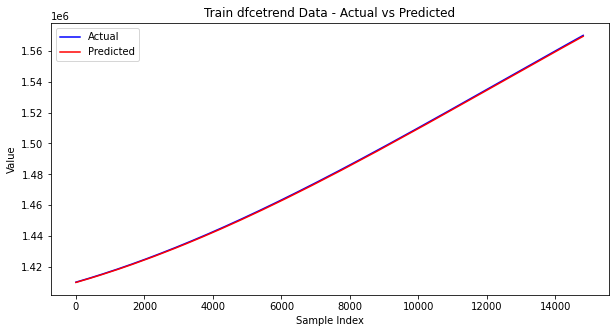

154/154 [==============================] - 2s 10ms/step
Validation dfcetrend Data: R^2 Score: 0.9951000267776668, MSE: 1303033.0595576556, RMSE: 1141.5047347942345, MAE: 1078.7857011634064, Explained Variance Score: 0.9994763423908181, Median Absolute Error: 994.8281780006364


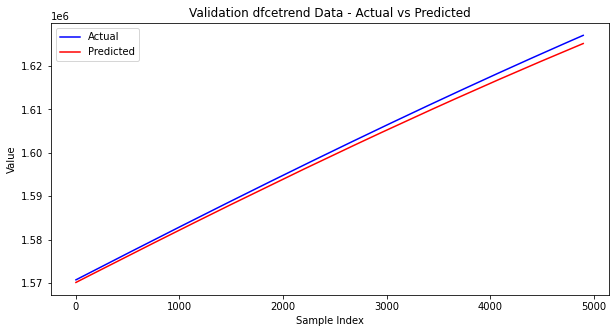

154/154 [==============================] - 2s 10ms/step
Test dfcetrend Data: R^2 Score: 0.9197512135870956, MSE: 12012251.128519783, RMSE: 3465.8694621292047, MAE: 3350.3675994612704, Explained Variance Score: 0.9947404602134406, Median Absolute Error: 3313.0337628412526


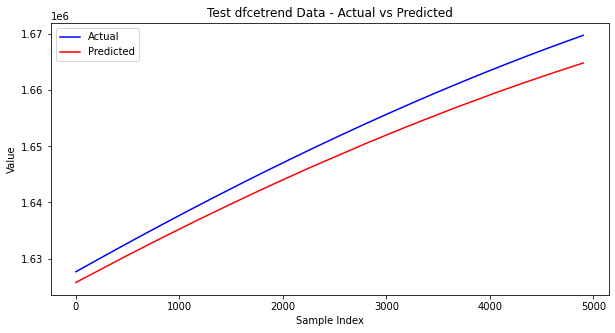

154/154 [==============================] - 2s 10ms/step
Predictions and actual values successfully saved for dfcetrend.
Total time taken for dfcetrend: 7747.13 seconds
Processing dataset: dfhigh12


IndexingError: Too many indexers

In [14]:
def preprocess_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df.iloc[:, 0:1] = scaler.fit_transform(df.iloc[:, 0:1])  # 只归一化第一列
    return df, scaler

def split_data(df):
    train_split = int(len(df) * 0.6)
    validation_split = int(len(df) * 0.8)
    df_for_training = df[:train_split]
    df_for_validation = df[train_split:validation_split]
    df_for_testing = df[validation_split:]
    return df_for_training, df_for_validation, df_for_testing

def create_dataset(dataset, n_past):
    dataX, dataY = [], []
    for i in range(n_past, len(dataset)):
        dataX.append(dataset.iloc[i - n_past:i, :].values)  # Assume all columns except target are features
        dataY.append(dataset.iloc[i, 0])  # Assuming target is the first column
    return np.array(dataX), np.array(dataY)

def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(loss='mae', optimizer=Adam(learning_rate=0.001))
    return model

def keras_model_wrapper(n_past, input_dim):
    def model():
        return build_model((n_past, input_dim))
    return model

def evaluate_model(model, X, y, scaler, dataset_type="Test"):
    prediction = model.predict(X)
    prediction = scaler.inverse_transform(prediction.reshape(-1, 1))
    y = scaler.inverse_transform(y.reshape(-1, 1))
    mse = mean_squared_error(y, prediction)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    evs = explained_variance_score(y, prediction)
    medae = median_absolute_error(y, prediction)
    print(f"{dataset_type} Data: R^2 Score: {r2}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}, Explained Variance Score: {evs}, Median Absolute Error: {medae}")
    
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(prediction, label='Predicted', color='red')
    plt.title(f'{dataset_type} Data - Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
def process_datasets(datasets):
    for name, df in datasets.items():
        print(f"Processing dataset: {name}")
        main(df, name)

def predict_and_save_results(model, X, y, scaler, dataset_name):
    try:
        predictions = model.predict(X)
        predictions_inverse = scaler.inverse_transform(predictions.reshape(-1, 1))
        y_inverse = scaler.inverse_transform(y.reshape(-1, 1))
        
        prediction_file = f'predictions_{dataset_name}.pkl'
        true_file = f'true_values_{dataset_name}.pkl'
        
        with open(prediction_file, 'wb') as f:
            pickle.dump(predictions_inverse, f)
        with open(true_file, 'wb') as f:
            pickle.dump(y_inverse, f)

        if os.path.exists(prediction_file) and os.path.exists(true_file):
            print(f"Predictions and actual values successfully saved for {dataset_name}.")
        else:
            print(f"Error: File not saved for {dataset_name}.")
            
    except Exception as e:
        print(f"Failed to save predictions for {dataset_name}: {str(e)}")

    
def main(df, dataset_name):
    start_time = time.time()

    df, scaler = preprocess_data(df)

    df_for_training, df_for_validation, df_for_testing = split_data(df)

    n_past = 56
    trainX, trainY = create_dataset(df_for_training, n_past)
    valX, valY = create_dataset(df_for_validation, n_past)
    testX, testY = create_dataset(df_for_testing, n_past)

    model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)
    parameters = {'batch_size': [16, 32], 'epochs': [50, 100]}

    grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=2)
    grid_search_result = grid_search.fit(trainX, trainY, validation_data=(valX, valY))

    best_model = grid_search_result.best_estimator_.model
    evaluate_model(best_model, trainX, trainY, scaler, f"Train {dataset_name}")
    evaluate_model(best_model, valX, valY, scaler, f"Validation {dataset_name}")
    evaluate_model(best_model, testX, testY, scaler, f"Test {dataset_name}")
    
    predict_and_save_results(best_model, testX, testY, scaler, dataset_name)
    
    best_model.save(f'best_model_{dataset_name}.h5')
    
    grid_search_info = {
        'best_params': grid_search_result.best_params_,
        'best_score': grid_search_result.best_score_
    }
    with open(f'grid_search_info_{dataset_name}.pkl', 'wb') as f:
        pickle.dump(grid_search_info, f)
    with open(f'scaler_{dataset_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    end_time = time.time()
    print(f"Total time taken for {dataset_name}: {end_time - start_time:.2f} seconds")

if __name__ == "__main__":
    datasets = {
        
        'dfcehigh': dfcehigh,
        'dfcelow': dfcelow,
        'dfcetrend': dfcetrend,
        'dfhigh12': dfhigh12,
        'dfhigh13': dfhigh13,
        'dfhigh23': dfhigh23,
    }
    process_datasets(datasets)


    


Processing dataset: dfhigh12


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3912\2353255836.py:109: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 17s 31ms/step - loss: 0.0540 - val_loss: 0.0394
Epoch 2/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0437 - val_loss: 0.0409
Epoch 3/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0409 - val_loss: 0.0396
Epoch 4/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0391 - val_loss: 0.0389
Epoch 5/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0366 - val_loss: 0.0410
Epoch 6/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0353 - val_loss: 0.0381
Epoch 7/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0341 - val_loss: 0.0379
Epoch 8/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0330 - val_loss: 0.0389
Epoch 9/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0320 - val_loss: 0.0373
Epoch 10/50
463/463 [==============================] - 14s 30ms/step - loss: 0.031

463/463 [==============================] - 12s 27ms/step - loss: 0.0249 - val_loss: 0.0338
Epoch 31/50
463/463 [==============================] - 12s 27ms/step - loss: 0.0249 - val_loss: 0.0344
Epoch 32/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0248 - val_loss: 0.0336
Epoch 33/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0247 - val_loss: 0.0337
Epoch 34/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0246 - val_loss: 0.0344
Epoch 35/50
463/463 [==============================] - 12s 27ms/step - loss: 0.0246 - val_loss: 0.0328
Epoch 36/50
463/463 [==============================] - 13s 27ms/step - loss: 0.0243 - val_loss: 0.0326
Epoch 37/50
463/463 [==============================] - 12s 27ms/step - loss: 0.0240 - val_loss: 0.0320
Epoch 38/50
463/463 [==============================] - 12s 27ms/step - loss: 0.0235 - val_loss: 0.0316
Epoch 39/50
463/463 [==============================] - 12s 27ms/step - loss: 0.0233 -

463/463 [==============================] - 12s 27ms/step - loss: 0.0239 - val_loss: 0.0323
Epoch 37/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0238 - val_loss: 0.0309
Epoch 38/100
463/463 [==============================] - 13s 27ms/step - loss: 0.0234 - val_loss: 0.0315
Epoch 39/100
463/463 [==============================] - 13s 28ms/step - loss: 0.0228 - val_loss: 0.0307
Epoch 40/100
463/463 [==============================] - 13s 27ms/step - loss: 0.0224 - val_loss: 0.0301
Epoch 41/100
463/463 [==============================] - 12s 26ms/step - loss: 0.0221 - val_loss: 0.0309
Epoch 42/100
463/463 [==============================] - 12s 26ms/step - loss: 0.0222 - val_loss: 0.0299
Epoch 43/100
463/463 [==============================] - 12s 26ms/step - loss: 0.0218 - val_loss: 0.0293
Epoch 44/100
463/463 [==============================] - 12s 26ms/step - loss: 0.0219 - val_loss: 0.0312
Epoch 45/100
463/463 [==============================] - 12s 26ms/step - loss:

Epoch 44/50
232/232 [==============================] - 8s 36ms/step - loss: 0.0253 - val_loss: 0.0349
Epoch 45/50
232/232 [==============================] - 8s 36ms/step - loss: 0.0253 - val_loss: 0.0349
Epoch 46/50
232/232 [==============================] - 8s 36ms/step - loss: 0.0252 - val_loss: 0.0349
Epoch 47/50
232/232 [==============================] - 8s 36ms/step - loss: 0.0251 - val_loss: 0.0347
Epoch 48/50
232/232 [==============================] - 8s 36ms/step - loss: 0.0252 - val_loss: 0.0348
Epoch 49/50
232/232 [==============================] - 8s 36ms/step - loss: 0.0249 - val_loss: 0.0345
Epoch 50/50
232/232 [==============================] - 2s 10ms/step - loss: 0.0286
Epoch 1/100
232/232 [==============================] - 11s 40ms/step - loss: 0.0632 - val_loss: 0.0406
Epoch 2/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0466 - val_loss: 0.0398
Epoch 3/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0433 - val_loss: 0.041

Epoch 73/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0207 - val_loss: 0.0247
Epoch 74/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0204 - val_loss: 0.0246
Epoch 75/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0203 - val_loss: 0.0249
Epoch 76/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0203 - val_loss: 0.0256
Epoch 77/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0204 - val_loss: 0.0246
Epoch 78/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0205 - val_loss: 0.0242
Epoch 79/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0204 - val_loss: 0.0243
Epoch 80/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0203 - val_loss: 0.0246
Epoch 81/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0203 - val_loss: 0.0240
Epoch 82/100
232/232 [==============================] - 9s 38ms/step - lo

Epoch 52/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0248 - val_loss: 0.0338
Epoch 53/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0247 - val_loss: 0.0336
Epoch 54/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0244 - val_loss: 0.0338
Epoch 55/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0245 - val_loss: 0.0336
Epoch 56/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0244 - val_loss: 0.0334
Epoch 57/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0243 - val_loss: 0.0330
Epoch 58/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0243 - val_loss: 0.0327
Epoch 59/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0242 - val_loss: 0.0329
Epoch 60/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0239 - val_loss: 0.0313
Epoch 61/100
232/232 [==============================] - 9s 37ms/step - lo

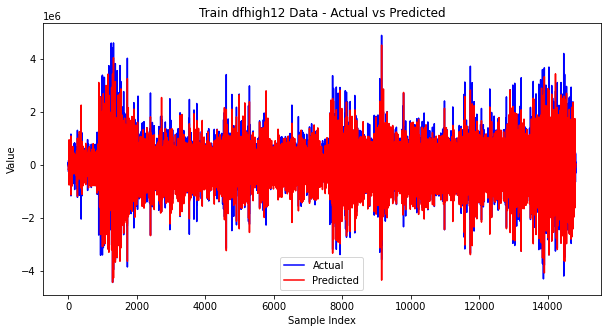

154/154 [==============================] - 2s 10ms/step
Validation dfhigh12 Data: R^2 Score: 0.6941774675386283, MSE: 191511317575.77667, RMSE: 437620.06075564754, MAE: 288407.6432502393, Explained Variance Score: 0.6972316638951057, Median Absolute Error: 197808.86218055035


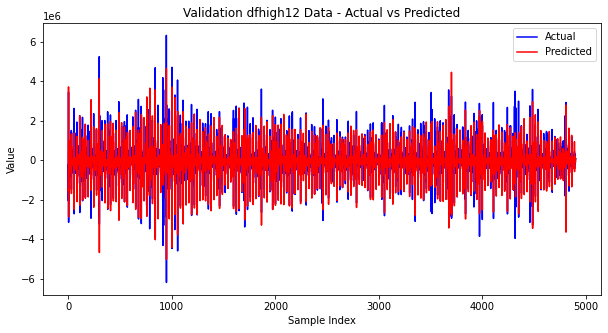

154/154 [==============================] - 2s 10ms/step
Test dfhigh12 Data: R^2 Score: 0.6668699130159141, MSE: 141111481735.0613, RMSE: 375648.082299193, MAE: 245938.7437587367, Explained Variance Score: 0.6734802286892114, Median Absolute Error: 170502.293919007


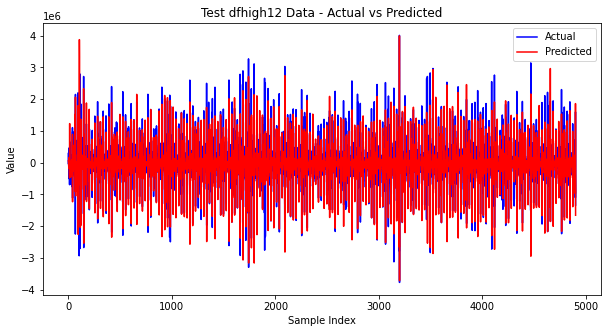

154/154 [==============================] - 2s 10ms/step
Predictions and actual values successfully saved for dfhigh12.
Total time taken for dfhigh12: 9159.82 seconds
Processing dataset: dfhigh13


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3912\2353255836.py:109: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 17s 31ms/step - loss: 0.0668 - val_loss: 0.0632
Epoch 2/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0586 - val_loss: 0.0612
Epoch 3/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0563 - val_loss: 0.0614
Epoch 4/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0546 - val_loss: 0.0611
Epoch 5/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0538 - val_loss: 0.0615
Epoch 6/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0525 - val_loss: 0.0653
Epoch 7/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0518 - val_loss: 0.0598
Epoch 8/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0505 - val_loss: 0.0599
Epoch 9/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0502 - val_loss: 0.0590
Epoch 10/50
463/463 [==============================] - 13s 29ms/step - loss: 0.049

463/463 [==============================] - 11s 25ms/step - loss: 0.0385 - val_loss: 0.0538
Epoch 31/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0383 - val_loss: 0.0536
Epoch 32/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0382 - val_loss: 0.0536
Epoch 33/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0381 - val_loss: 0.0534
Epoch 34/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0377 - val_loss: 0.0542
Epoch 35/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0376 - val_loss: 0.0532
Epoch 36/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0376 - val_loss: 0.0529
Epoch 37/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0374 - val_loss: 0.0533
Epoch 38/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0372 - val_loss: 0.0548
Epoch 39/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0371 -

463/463 [==============================] - 12s 26ms/step - loss: 0.0376 - val_loss: 0.0535
Epoch 37/100
463/463 [==============================] - 12s 26ms/step - loss: 0.0374 - val_loss: 0.0535
Epoch 38/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0374 - val_loss: 0.0533
Epoch 39/100
463/463 [==============================] - 13s 29ms/step - loss: 0.0371 - val_loss: 0.0529
Epoch 40/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0370 - val_loss: 0.0533
Epoch 41/100
463/463 [==============================] - 13s 29ms/step - loss: 0.0367 - val_loss: 0.0539
Epoch 42/100
463/463 [==============================] - 13s 28ms/step - loss: 0.0369 - val_loss: 0.0531
Epoch 43/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0367 - val_loss: 0.0530
Epoch 44/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0365 - val_loss: 0.0521
Epoch 45/100
463/463 [==============================] - 14s 30ms/step - loss:

Epoch 44/50
232/232 [==============================] - 9s 37ms/step - loss: 0.0386 - val_loss: 0.0551
Epoch 45/50
232/232 [==============================] - 9s 37ms/step - loss: 0.0386 - val_loss: 0.0546
Epoch 46/50
232/232 [==============================] - 9s 37ms/step - loss: 0.0385 - val_loss: 0.0549
Epoch 47/50
232/232 [==============================] - 9s 37ms/step - loss: 0.0384 - val_loss: 0.0548
Epoch 48/50
232/232 [==============================] - 9s 37ms/step - loss: 0.0386 - val_loss: 0.0545
Epoch 49/50
232/232 [==============================] - 9s 37ms/step - loss: 0.0383 - val_loss: 0.0545
Epoch 50/50
232/232 [==============================] - 2s 10ms/step - loss: 0.0447
Epoch 1/100
232/232 [==============================] - 11s 38ms/step - loss: 0.0707 - val_loss: 0.0621
Epoch 2/100
232/232 [==============================] - 8s 35ms/step - loss: 0.0594 - val_loss: 0.0614
Epoch 3/100
232/232 [==============================] - 8s 35ms/step - loss: 0.0578 - val_loss: 0.061

Epoch 73/100
232/232 [==============================] - 8s 35ms/step - loss: 0.0366 - val_loss: 0.0449
Epoch 74/100
232/232 [==============================] - 8s 35ms/step - loss: 0.0365 - val_loss: 0.0444
Epoch 75/100
232/232 [==============================] - 8s 36ms/step - loss: 0.0363 - val_loss: 0.0438
Epoch 76/100
232/232 [==============================] - 10s 41ms/step - loss: 0.0359 - val_loss: 0.0448
Epoch 77/100
232/232 [==============================] - 9s 38ms/step - loss: 0.0361 - val_loss: 0.0448
Epoch 78/100
232/232 [==============================] - 8s 35ms/step - loss: 0.0358 - val_loss: 0.0445
Epoch 79/100
232/232 [==============================] - 8s 37ms/step - loss: 0.0357 - val_loss: 0.0473
Epoch 80/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0360 - val_loss: 0.0437
Epoch 81/100
232/232 [==============================] - 9s 40ms/step - loss: 0.0356 - val_loss: 0.0443
Epoch 82/100
232/232 [==============================] - 9s 38ms/step - l

926/926 [==============================] - 25s 27ms/step - loss: 0.0350 - val_loss: 0.0449
Epoch 30/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0344 - val_loss: 0.0446
Epoch 31/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0342 - val_loss: 0.0441
Epoch 32/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0342 - val_loss: 0.0444
Epoch 33/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0340 - val_loss: 0.0446
Epoch 34/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0336 - val_loss: 0.0438
Epoch 35/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0336 - val_loss: 0.0435
Epoch 36/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0333 - val_loss: 0.0448
Epoch 37/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0334 - val_loss: 0.0454
Epoch 38/100
926/926 [==============================] - 25s 27ms/step - loss:

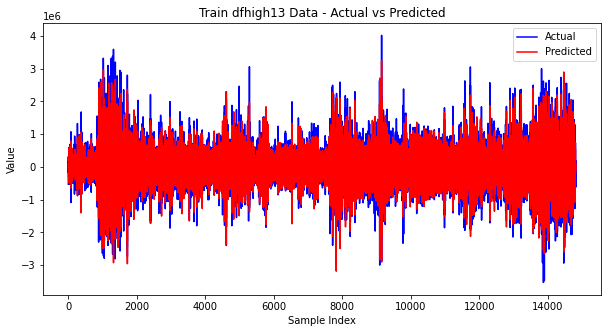

154/154 [==============================] - 2s 12ms/step
Validation dfhigh13 Data: R^2 Score: 0.5018571413863568, MSE: 315247621174.8075, RMSE: 561469.1631557405, MAE: 384771.9237324728, Explained Variance Score: 0.5020059451919254, Median Absolute Error: 269659.43814151397


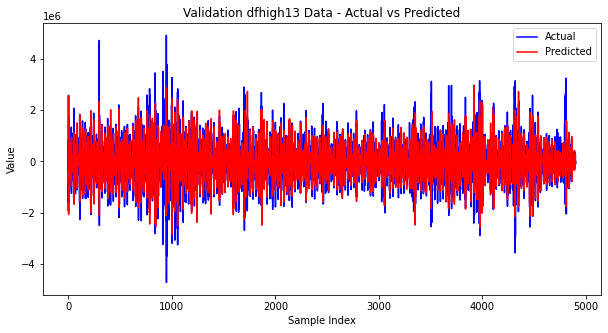

154/154 [==============================] - 2s 11ms/step
Test dfhigh13 Data: R^2 Score: 0.5251865297281305, MSE: 203351561751.50443, RMSE: 450945.1870809849, MAE: 319977.6992978425, Explained Variance Score: 0.5279063775881889, Median Absolute Error: 230942.66570576507


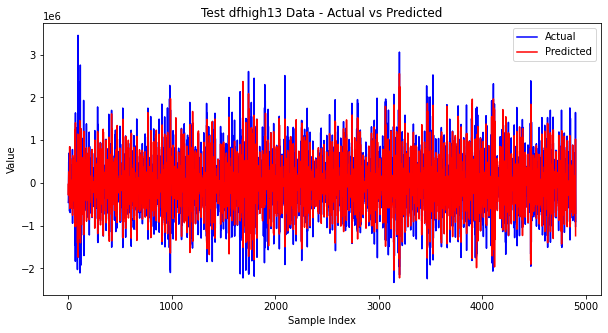

154/154 [==============================] - 2s 12ms/step
Predictions and actual values successfully saved for dfhigh13.
Total time taken for dfhigh13: 9081.54 seconds
Processing dataset: dfhigh23


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3912\2353255836.py:109: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 17s 32ms/step - loss: 0.0697 - val_loss: 0.0697
Epoch 2/50
463/463 [==============================] - 15s 32ms/step - loss: 0.0630 - val_loss: 0.0665
Epoch 3/50
463/463 [==============================] - 13s 29ms/step - loss: 0.0601 - val_loss: 0.0635
Epoch 4/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0581 - val_loss: 0.0639
Epoch 5/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0556 - val_loss: 0.0609
Epoch 6/50
463/463 [==============================] - 14s 31ms/step - loss: 0.0541 - val_loss: 0.0599
Epoch 7/50
463/463 [==============================] - 14s 30ms/step - loss: 0.0518 - val_loss: 0.0563
Epoch 8/50
463/463 [==============================] - 15s 32ms/step - loss: 0.0472 - val_loss: 0.0494
Epoch 9/50
463/463 [==============================] - 15s 31ms/step - loss: 0.0415 - val_loss: 0.0451
Epoch 10/50
463/463 [==============================] - 14s 31ms/step - loss: 0.039

463/463 [==============================] - 12s 25ms/step - loss: 0.0297 - val_loss: 0.0457
Epoch 31/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0295 - val_loss: 0.0457
Epoch 32/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0295 - val_loss: 0.0457
Epoch 33/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0294 - val_loss: 0.0453
Epoch 34/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0294 - val_loss: 0.0460
Epoch 35/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0295 - val_loss: 0.0456
Epoch 36/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0293 - val_loss: 0.0455
Epoch 37/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0293 - val_loss: 0.0453
Epoch 38/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0293 - val_loss: 0.0457
Epoch 39/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0292 -

463/463 [==============================] - 12s 25ms/step - loss: 0.0293 - val_loss: 0.0457
Epoch 37/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0293 - val_loss: 0.0453
Epoch 38/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0292 - val_loss: 0.0459
Epoch 39/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0293 - val_loss: 0.0456
Epoch 40/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0292 - val_loss: 0.0456
Epoch 41/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0292 - val_loss: 0.0456
Epoch 42/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0294 - val_loss: 0.0464
Epoch 43/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0291 - val_loss: 0.0453
Epoch 44/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0291 - val_loss: 0.0457
Epoch 45/100
463/463 [==============================] - 11s 25ms/step - loss:

232/232 [==============================] - 9s 38ms/step - loss: 0.0296 - val_loss: 0.0457
Epoch 44/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0294 - val_loss: 0.0453
Epoch 45/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0295 - val_loss: 0.0457
Epoch 46/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0294 - val_loss: 0.0455
Epoch 47/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0295 - val_loss: 0.0456
Epoch 48/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0295 - val_loss: 0.0456
Epoch 49/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0295 - val_loss: 0.0462
Epoch 50/50
232/232 [==============================] - 3s 11ms/step - loss: 0.0365
Epoch 1/100
232/232 [==============================] - 11s 39ms/step - loss: 0.0785 - val_loss: 0.0653
Epoch 2/100
232/232 [==============================] - 8s 36ms/step - loss: 0.0629 - val_loss: 0.0655
Epoch 3/10

232/232 [==============================] - 8s 36ms/step - loss: 0.0339 - val_loss: 0.0420
Epoch 73/100
232/232 [==============================] - 8s 36ms/step - loss: 0.0336 - val_loss: 0.0420
Epoch 74/100
232/232 [==============================] - 9s 37ms/step - loss: 0.0335 - val_loss: 0.0412
Epoch 75/100
232/232 [==============================] - 8s 36ms/step - loss: 0.0333 - val_loss: 0.0416
Epoch 76/100
232/232 [==============================] - 8s 36ms/step - loss: 0.0333 - val_loss: 0.0416
Epoch 77/100
232/232 [==============================] - 8s 36ms/step - loss: 0.0332 - val_loss: 0.0411
Epoch 78/100
232/232 [==============================] - 8s 36ms/step - loss: 0.0327 - val_loss: 0.0405
Epoch 79/100
232/232 [==============================] - 8s 36ms/step - loss: 0.0328 - val_loss: 0.0401
Epoch 80/100
232/232 [==============================] - 8s 36ms/step - loss: 0.0323 - val_loss: 0.0399
Epoch 81/100
232/232 [==============================] - 8s 36ms/step - loss: 0.0324 - 

232/232 [==============================] - 8s 34ms/step - loss: 0.0294 - val_loss: 0.0462
Epoch 52/100
232/232 [==============================] - 8s 35ms/step - loss: 0.0294 - val_loss: 0.0457
Epoch 53/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0293 - val_loss: 0.0458
Epoch 54/100
232/232 [==============================] - 8s 35ms/step - loss: 0.0293 - val_loss: 0.0458
Epoch 55/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0292 - val_loss: 0.0455
Epoch 56/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0292 - val_loss: 0.0459
Epoch 57/100
232/232 [==============================] - 8s 35ms/step - loss: 0.0291 - val_loss: 0.0455
Epoch 58/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0292 - val_loss: 0.0457
Epoch 59/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0292 - val_loss: 0.0457
Epoch 60/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0292 - 

Epoch 30/100
926/926 [==============================] - 24s 26ms/step - loss: 0.0306 - val_loss: 0.0421
Epoch 31/100
926/926 [==============================] - 24s 26ms/step - loss: 0.0304 - val_loss: 0.0405
Epoch 32/100
926/926 [==============================] - 24s 26ms/step - loss: 0.0302 - val_loss: 0.0397
Epoch 33/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0300 - val_loss: 0.0397
Epoch 34/100
926/926 [==============================] - 24s 26ms/step - loss: 0.0295 - val_loss: 0.0397
Epoch 35/100
926/926 [==============================] - 24s 26ms/step - loss: 0.0294 - val_loss: 0.0392
Epoch 36/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0290 - val_loss: 0.0390
Epoch 37/100
926/926 [==============================] - 24s 26ms/step - loss: 0.0287 - val_loss: 0.0377
Epoch 38/100
926/926 [==============================] - 24s 26ms/step - loss: 0.0283 - val_loss: 0.0373
Epoch 39/100
926/926 [==============================] - 25s 27ms

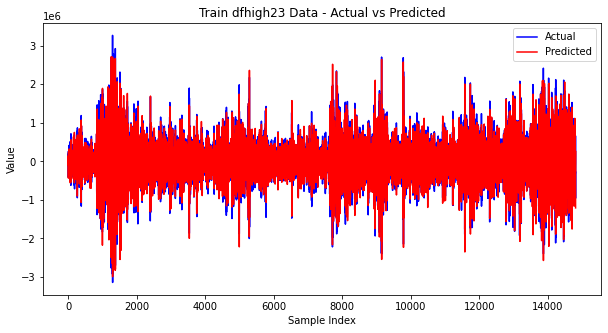

154/154 [==============================] - 2s 13ms/step
Validation dfhigh23 Data: R^2 Score: 0.6927865647080307, MSE: 126319458859.20465, RMSE: 355414.48881440476, MAE: 238954.3613232933, Explained Variance Score: 0.6934814761730468, Median Absolute Error: 163773.8606074981


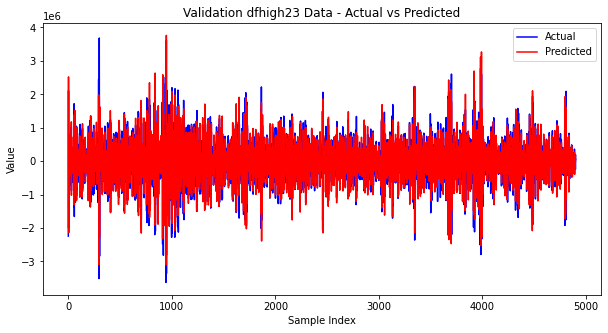

154/154 [==============================] - 2s 13ms/step
Test dfhigh23 Data: R^2 Score: 0.7172747774460533, MSE: 80327767768.72812, RMSE: 283421.53723513696, MAE: 197569.24670594948, Explained Variance Score: 0.7187680247128536, Median Absolute Error: 138632.38385637238


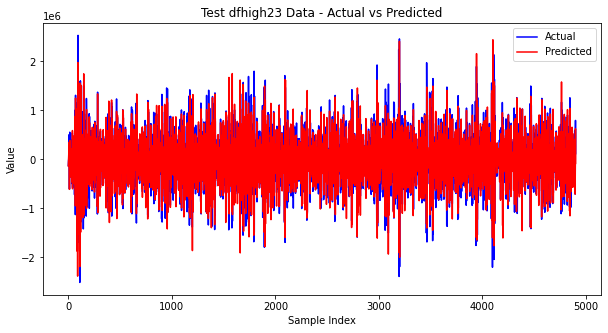

154/154 [==============================] - 2s 12ms/step
Predictions and actual values successfully saved for dfhigh23.
Total time taken for dfhigh23: 9199.82 seconds


In [19]:
def preprocess_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df.iloc[:, 0:1] = scaler.fit_transform(df.iloc[:, 0:1])  # 只归一化第一列
    return df, scaler

def split_data(df):
    train_split = int(len(df) * 0.6)
    validation_split = int(len(df) * 0.8)
    df_for_training = df[:train_split]
    df_for_validation = df[train_split:validation_split]
    df_for_testing = df[validation_split:]
    return df_for_training, df_for_validation, df_for_testing

def create_dataset(dataset, n_past):
    dataX, dataY = [], []
    for i in range(n_past, len(dataset)):
        dataX.append(dataset.iloc[i - n_past:i, :].values)  # Assume all columns except target are features
        dataY.append(dataset.iloc[i, 0])  # Assuming target is the first column
    return np.array(dataX), np.array(dataY)

def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(loss='mae', optimizer=Adam(learning_rate=0.001))
    return model

def keras_model_wrapper(n_past, input_dim):
    def model():
        return build_model((n_past, input_dim))
    return model

def evaluate_model(model, X, y, scaler, dataset_type="Test"):
    prediction = model.predict(X)
    prediction = scaler.inverse_transform(prediction.reshape(-1, 1))
    y = scaler.inverse_transform(y.reshape(-1, 1))
    mse = mean_squared_error(y, prediction)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    evs = explained_variance_score(y, prediction)
    medae = median_absolute_error(y, prediction)
    print(f"{dataset_type} Data: R^2 Score: {r2}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}, Explained Variance Score: {evs}, Median Absolute Error: {medae}")
    
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(prediction, label='Predicted', color='red')
    plt.title(f'{dataset_type} Data - Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
def process_datasets(datasets):
    for name, df in datasets.items():
        print(f"Processing dataset: {name}")
        main(df, name)



def predict_and_save_results(model, X, y, scaler, dataset_name):
    try:
        predictions = model.predict(X)
        predictions_inverse = scaler.inverse_transform(predictions.reshape(-1, 1))
        y_inverse = scaler.inverse_transform(y.reshape(-1, 1))
        
        prediction_file = f'predictions_{dataset_name}.pkl'
        true_file = f'true_values_{dataset_name}.pkl'
        
        with open(prediction_file, 'wb') as f:
            pickle.dump(predictions_inverse, f)
        with open(true_file, 'wb') as f:
            pickle.dump(y_inverse, f)
        
        # 确认文件被保存
        if os.path.exists(prediction_file) and os.path.exists(true_file):
            print(f"Predictions and actual values successfully saved for {dataset_name}.")
        else:
            print(f"Error: File not saved for {dataset_name}.")
            
    except Exception as e:
        print(f"Failed to save predictions for {dataset_name}: {str(e)}")

    
def main(df, dataset_name):
    start_time = time.time()

    df, scaler = preprocess_data(df)

    df_for_training, df_for_validation, df_for_testing = split_data(df)

    n_past = 56
    trainX, trainY = create_dataset(df_for_training, n_past)
    valX, valY = create_dataset(df_for_validation, n_past)
    testX, testY = create_dataset(df_for_testing, n_past)

    model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)

    grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=2)
    grid_search_result = grid_search.fit(trainX, trainY, validation_data=(valX, valY))

    best_model = grid_search_result.best_estimator_.model
    evaluate_model(best_model, trainX, trainY, scaler, f"Train {dataset_name}")
    evaluate_model(best_model, valX, valY, scaler, f"Validation {dataset_name}")
    evaluate_model(best_model, testX, testY, scaler, f"Test {dataset_name}")

    predict_and_save_results(best_model, testX, testY, scaler, dataset_name)

    best_model.save(f'best_model_{dataset_name}.h5')

    grid_search_info = {
        'best_params': grid_search_result.best_params_,
        'best_score': grid_search_result.best_score_
    }
    with open(f'grid_search_info_{dataset_name}.pkl', 'wb') as f:
        pickle.dump(grid_search_info, f)
    with open(f'scaler_{dataset_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    end_time = time.time()
    print(f"Total time taken for {dataset_name}: {end_time - start_time:.2f} seconds")

if __name__ == "__main__":
    datasets = {
        
        
        'dfhigh12': dfhigh12,
        'dfhigh13': dfhigh13,
        'dfhigh23': dfhigh23,
    }
    process_datasets(datasets)


Data Evaluation - R^2 Score: 0.6573874258077984, MSE: 332871785273.8757, RMSE: 576950.4183843493, MAE: 374550.5209735822, Explained Variance Score: 0.6574795818864401, Median Absolute Error: 232363.3125


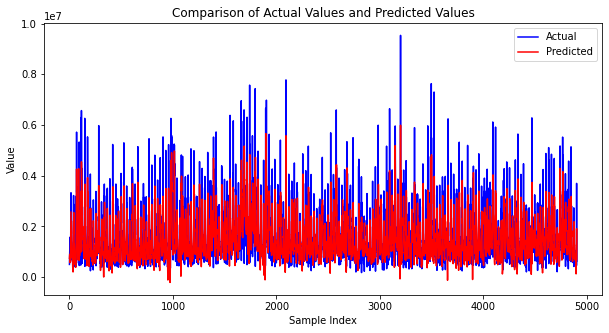

Data Evaluation - R^2 Score: 0.8276810720874103, MSE: 167419743148.61453, RMSE: 409169.57749643916, MAE: 279264.97265146876, Explained Variance Score: 0.828186301474229, Median Absolute Error: 199866.5


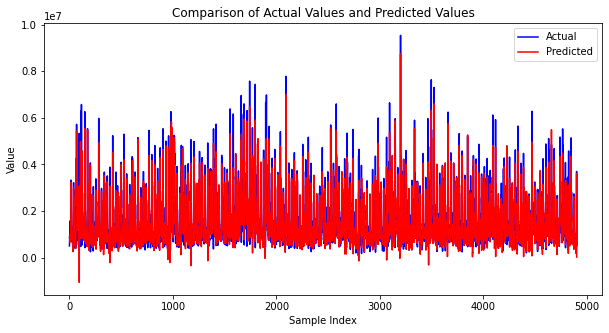

Data Evaluation - R^2 Score: 0.5517832633680366, MSE: 435473524765.0704, RMSE: 659904.1784722009, MAE: 472744.5167916157, Explained Variance Score: 0.5517897050017883, Median Absolute Error: 319879.3125


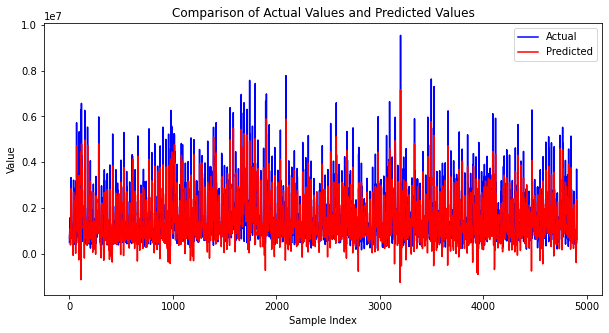

Data Evaluation - R^2 Score: 0.7234955081040277, MSE: 268643216235.32855, RMSE: 518308.03219256457, MAE: 362315.5964529784, Explained Variance Score: 0.7235033344723493, Median Absolute Error: 252157.28125


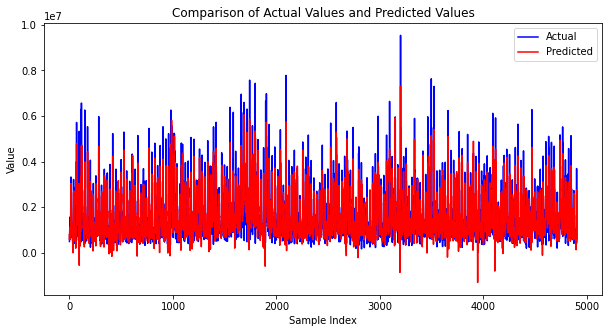

In [26]:
def load_predictions(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

def evaluate_predictions(true_values, combined_predictions):
    mse = mean_squared_error(true_values, combined_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, combined_predictions)
    r2 = r2_score(true_values, combined_predictions)
    evs = explained_variance_score(true_values, combined_predictions)
    medae = median_absolute_error(true_values, combined_predictions)
    print(f"Data Evaluation - R^2 Score: {r2}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}, Explained Variance Score: {evs}, Median Absolute Error: {medae}")

    plt.figure(figsize=(10, 5))
    plt.plot(true_values, label='Actual', color='blue')
    plt.plot(combined_predictions, label='Predicted', color='red')
    plt.title('Comparison of Actual Values and Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

predictions_high = load_predictions('predictions_dfcehigh.pkl')  
predictions_high12 = load_predictions('predictions_dfhigh12.pkl')
predictions_high23 = load_predictions('predictions_dfhigh23.pkl')
predictions_high13 = load_predictions('predictions_dfhigh13.pkl')
predictions_low = load_predictions('predictions_dfcelow.pkl')
predictions_trend = load_predictions('predictions_dfcetrend.pkl')

combined_predictions123 = predictions_high + predictions_low + predictions_trend
combined_predictions12 = predictions_high12 + predictions_low + predictions_trend
combined_predictions23 = predictions_high23 + predictions_low + predictions_trend
combined_predictions13 = predictions_high13 + predictions_low + predictions_trend

with open('combined_predictions123.pkl', 'wb') as f:
    pickle.dump(combined_predictions123, f)
with open('combined_predictions12.pkl', 'wb') as f:
    pickle.dump(combined_predictions12, f)
with open('combined_predictions23.pkl', 'wb') as f:
    pickle.dump(combined_predictions23, f)
with open('combined_predictions13.pkl', 'wb') as f:
    pickle.dump(combined_predictions13, f)

true_values = load_predictions('true_values_dfbasic2020.pkl')

evaluate_predictions(true_values, combined_predictions123)
evaluate_predictions(true_values, combined_predictions12)
evaluate_predictions(true_values, combined_predictions23)
evaluate_predictions(true_values, combined_predictions13)


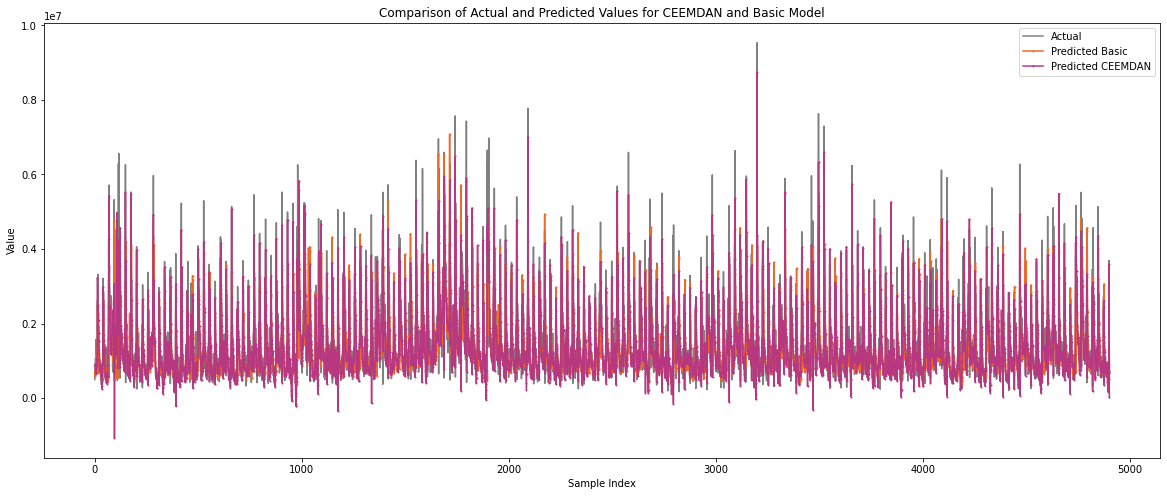

In [43]:

def load_and_plot_comparisons(dataset_names, true_dataset_name):
    plt.figure(figsize=(20, 8))

    colors = {
        'predictions_dfbasic2020': (0.929, 0.408, 0.145),  # Orange
        'combined_predictions12': (0.718, 0.216, 0.502)   # Purple
    }

    with open(f'true_values_{true_dataset_name}.pkl', 'rb') as f:
        true_values = pickle.load(f)
    plt.plot(true_values, label='Actual', color='grey', linestyle='-', marker='x', markersize=0)  # Black for actual values

    name_mapping = {
        'predictions_dfbasic2020': 'Basic',
        'combined_predictions12': 'CEEMDAN'
    }

    for dataset_name in dataset_names:
        with open(f'{dataset_name}.pkl', 'rb') as f:
            predictions = pickle.load(f)
        plt.plot(predictions, label=f'Predicted {name_mapping.get(dataset_name, "Unknown")}', color=colors.get(dataset_name, 'gray'), linestyle='-', marker='.', markersize=2)

    plt.title(f'Comparison of Actual and Predicted Values for CEEMDAN and Basic Model')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

dataset_names = ['predictions_dfbasic2020', 'combined_predictions12']  
true_dataset_name = 'dfbasic2020'  
load_and_plot_comparisons(dataset_names, true_dataset_name)
